In [246]:
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
import numpy as np
import datetime 
import plotly.graph_objects as go
import plotly.express as px

# Exploratory Data Analysis

In [55]:
df=pd.read_excel('/Users/immortal/Desktop/DataScience/Milestone1/US Superstore data.csv')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [37]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [38]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [57]:
#Checking for missing values.. 
df.isna().sum() #unfortunately the data has not missing values :( 

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [58]:
df.duplicated().sum() # Checking for Duplicated Rows

0

In [59]:
# Drop Unnecessary Columns 
df.drop(['Row ID','Order ID' ,'Customer ID','Postal Code' , 'Product ID' ], axis=1 , inplace=True)
df.head()

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,Country,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,2016-06-12,2016-06-16,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [60]:
df['Country'].unique()

array(['United States'], dtype=object)

In [61]:
# Drop Country Column because the analysis is on United States only 
df.drop(['Country'], axis=1 , inplace=True)
df.head()

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,2016-06-12,2016-06-16,Second Class,Darrin Van Huff,Corporate,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [183]:
df_negative_prof=df[df['Profit']<0] # records that have negative Profit ---> Saved it in new DataFrame for Later !
df_negative_prof.head()

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Sell_Price,year,time_shipping_spent
3,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,3016.369125,2015,7
14,2015-11-22,2015-11-26,Standard Class,Harold Pawlan,Home Office,Fort Worth,Texas,Central,Office Supplies,Appliances,Holmes Replacement Filter for HEPA Air Cleaner...,68.8100,5,0.80,-123.8580,192.668000,2015,4
15,2015-11-22,2015-11-26,Standard Class,Harold Pawlan,Home Office,Fort Worth,Texas,Central,Office Supplies,Binders,Storex DuraTech Recycled Plastic Frosted Binders,2.5440,3,0.80,-3.8160,5.342400,2015,4
23,2017-07-16,2017-07-18,Second Class,Sandra Flanagan,Consumer,Philadelphia,Pennsylvania,East,Furniture,Chairs,"Global Deluxe Stacking Chair, Gray",71.3720,2,0.30,-1.0196,100.940400,2017,2
27,2015-09-17,2015-09-21,Standard Class,Tracy Blumstein,Consumer,Philadelphia,Pennsylvania,East,Furniture,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",3083.4300,7,0.50,-1665.0522,12457.057200,2015,4


In [184]:
df_positive_prof=df[df['Profit']>0] #records that have positive Profit
df_positive_prof.head()

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Sell_Price,year,time_shipping_spent
0,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960,2,0.0,41.9136,482.0064,2016,3
1,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.940,3,0.0,219.5820,1976.2380,2016,3
2,2016-06-12,2016-06-16,Second Class,Darrin Van Huff,Corporate,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,0.0,6.8714,22.3686,2016,4
4,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368,2,0.2,2.5164,33.2724,2015,7
5,2014-06-09,2014-06-14,Standard Class,Brosina Hoffman,Consumer,Los Angeles,California,West,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.860,7,0.0,14.1694,327.8506,2014,5


In [66]:
# Make new column name sell_price Which describe how the profit comes from 
df['Sell_Price']=df.apply(lambda x : ((x['Sales']*x['Quantity'])-(x['Sales']*x['Quantity'])*x['Discount'])-x['Profit'] , axis=1)
df.head()

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Sell_Price
0,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,482.006400
1,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,1976.238000
2,2016-06-12,2016-06-16,Second Class,Darrin Van Huff,Corporate,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,22.368600
3,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,3016.369125
4,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,33.272400


<AxesSubplot:xlabel='Category', ylabel='Sales'>

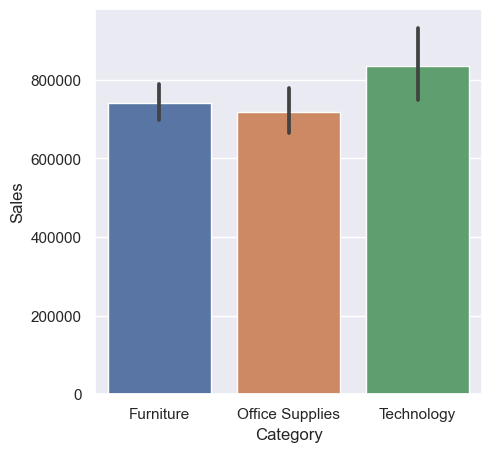

In [317]:
sns.set(rc={'figure.figsize':(5,5)})
sns.barplot(x='Category' , y='Sales' , estimator= sum , data=df) # The best categories he sales

<AxesSubplot:xlabel='Category', ylabel='Profit'>

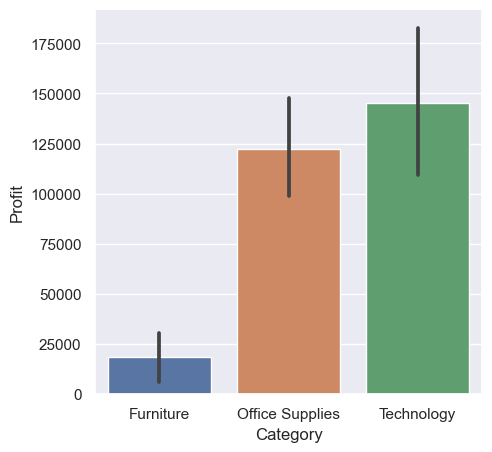

In [316]:
sns.set(rc={'figure.figsize':(5,5)})
sns.barplot(x='Category' , y='Profit' , estimator= sum , data=df)  # Here he make more sales in furniture but he didn't make any profit on it ..

<AxesSubplot:xlabel='Category', ylabel='Quantity'>

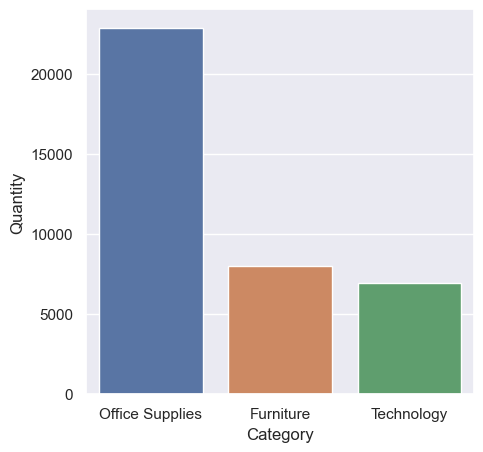

In [432]:
# Which category has more ordered by Quantity ?
sns.set(rc={'figure.figsize':(5,5)})
df_quantity=pd.DataFrame(df.groupby(['Category'])['Quantity'].sum().sort_values(ascending=False))
sns.barplot(data=df_quantity , x=df_quantity.index , y=df_quantity.Quantity )

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
3,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
14,2015-11-22,2015-11-26,Standard Class,Harold Pawlan,Home Office,Fort Worth,Texas,Central,Office Supplies,Appliances,Holmes Replacement Filter for HEPA Air Cleaner...,68.8100,5,0.80,-123.8580
15,2015-11-22,2015-11-26,Standard Class,Harold Pawlan,Home Office,Fort Worth,Texas,Central,Office Supplies,Binders,Storex DuraTech Recycled Plastic Frosted Binders,2.5440,3,0.80,-3.8160
23,2017-07-16,2017-07-18,Second Class,Sandra Flanagan,Consumer,Philadelphia,Pennsylvania,East,Furniture,Chairs,"Global Deluxe Stacking Chair, Gray",71.3720,2,0.30,-1.0196
27,2015-09-17,2015-09-21,Standard Class,Tracy Blumstein,Consumer,Philadelphia,Pennsylvania,East,Furniture,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",3083.4300,7,0.50,-1665.0522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9920,2016-03-15,2016-03-19,Standard Class,Muhammed Yedwab,Corporate,Bryan,Texas,Central,Office Supplies,Binders,"GBC Pre-Punched Binding Paper, Plastic, White,...",22.3860,7,0.80,-35.8176
9921,2014-11-24,2014-11-30,Standard Class,Alyssa Tate,Home Office,Akron,Ohio,East,Office Supplies,Binders,Acco Expandable Hanging Binders,5.7420,3,0.70,-4.5936
9931,2015-11-13,2015-11-17,Standard Class,Keith Herrera,Consumer,San Bernardino,California,West,Furniture,Bookcases,O'Sullivan Living Dimensions 3-Shelf Bookcases,683.3320,4,0.15,-40.1960
9937,2016-06-03,2016-06-06,Second Class,Christine Phan,Corporate,Los Angeles,California,West,Furniture,Tables,Hon 61000 Series Interactive Training Tables,71.0880,2,0.20,-1.7772


<AxesSubplot:xlabel='Profit', ylabel='Density'>

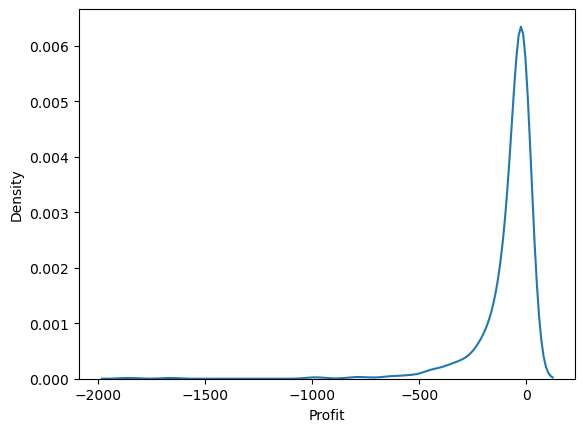

In [97]:
sns.kdeplot(df_negative_prof[df_negative_prof['Category']=='Furniture']['Profit']) 

In [168]:
df[df['Category']=='Furniture']['Profit'].sum() # he make 18451 $ profit only in furniture for all years

18451.272799999984

In [105]:
#Make new column year
df['year']=df['Order Date'].dt.year
df.head()

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Sell_Price,year
0,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,482.006400,2016
1,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,1976.238000,2016
2,2016-06-12,2016-06-16,Second Class,Darrin Van Huff,Corporate,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,22.368600,2016
3,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,3016.369125,2015
4,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,33.272400,2015


In [107]:
 # Which year he make more profit ?
df.groupby(['year'])['Profit'].sum().sort_values(ascending=False)

year
2017    93439.2696
2016    81795.1743
2015    61618.6037
2014    49543.9741
Name: Profit, dtype: float64

<AxesSubplot:xlabel='year', ylabel='Profit'>

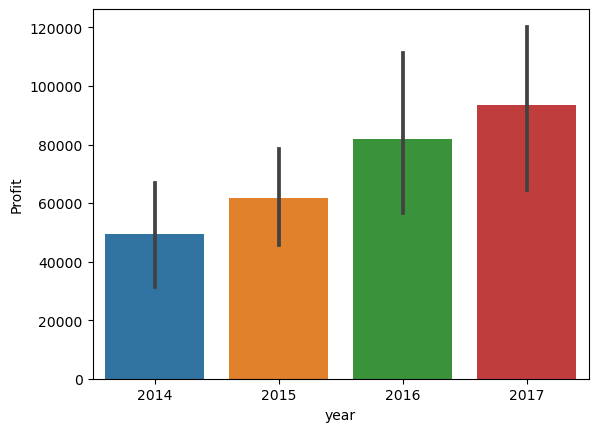

In [111]:
sns.barplot(x='year' , y='Profit' , data=df , estimator=sum) # He increase every year 

<AxesSubplot:xlabel='year', ylabel='Profit'>

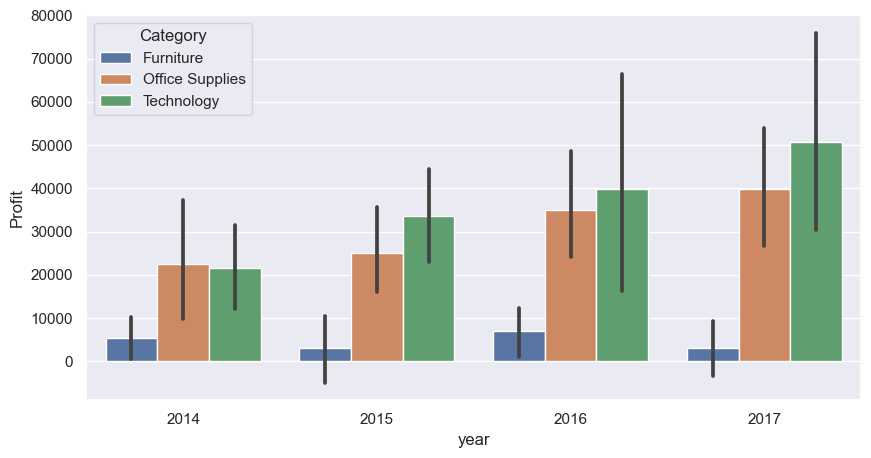

In [392]:
sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(x='year' , y='Profit' , data=df , estimator=sum , hue='Category') # Which year has more profit at which category ?

In [114]:
# Why he has less proft in furniture at year 2015 and 2017 ?
df[(df['year']==2017) | (df['year']==2015)]

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Sell_Price,year
3,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,3016.369125,2015
4,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,33.272400,2015
12,2017-04-15,2017-04-20,Standard Class,Andrew Allen,Consumer,Concord,North Carolina,South,Office Supplies,Paper,Xerox 1967,15.5520,3,0.20,5.4432,31.881600,2017
14,2015-11-22,2015-11-26,Standard Class,Harold Pawlan,Home Office,Fort Worth,Texas,Central,Office Supplies,Appliances,Holmes Replacement Filter for HEPA Air Cleaner...,68.8100,5,0.80,-123.8580,192.668000,2015
15,2015-11-22,2015-11-26,Standard Class,Harold Pawlan,Home Office,Fort Worth,Texas,Central,Office Supplies,Binders,Storex DuraTech Recycled Plastic Frosted Binders,2.5440,3,0.80,-3.8160,5.342400,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9988,2017-11-17,2017-11-21,Standard Class,Ruben Ausman,Corporate,Athens,Georgia,South,Technology,Phones,Panasonic KX - TS880B Telephone,206.1000,5,0.00,55.6470,974.853000,2017
9990,2017-02-26,2017-03-03,Standard Class,Dave Brooks,Consumer,Costa Mesa,California,West,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332,168.286800,2017
9991,2017-02-26,2017-03-03,Standard Class,Dave Brooks,Consumer,Costa Mesa,California,West,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932,394.328400,2017
9992,2017-02-26,2017-03-03,Standard Class,Dave Brooks,Consumer,Costa Mesa,California,West,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200,105.080000,2017


In [115]:
#Make a new column called time_shipping_spent to know how many days it takes for shipping
df['time_shipping_spent']=df['Ship Date']-df['Order Date']

In [117]:
df.head()

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Sell_Price,year,time_shipping_spent
0,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,482.006400,2016,3 days
1,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,1976.238000,2016,3 days
2,2016-06-12,2016-06-16,Second Class,Darrin Van Huff,Corporate,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,22.368600,2016,4 days
3,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,3016.369125,2015,7 days
4,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,33.272400,2015,7 days


In [128]:
# Display year 2015 and 2017 for firnuture..
df[((df['year']==2017) | (df['year']==2015)) & (df['Category']=='Furniture')]

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Sell_Price,year,time_shipping_spent
3,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,3016.369125,2015,7 days
23,2017-07-16,2017-07-18,Second Class,Sandra Flanagan,Consumer,Philadelphia,Pennsylvania,East,Furniture,Chairs,"Global Deluxe Stacking Chair, Gray",71.3720,2,0.30,-1.0196,100.940400,2017,2 days
24,2015-09-25,2015-09-30,Standard Class,Emily Burns,Consumer,Orem,Utah,West,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,1044.6300,3,0.00,240.2649,2893.625100,2015,5 days
27,2015-09-17,2015-09-21,Standard Class,Tracy Blumstein,Consumer,Philadelphia,Pennsylvania,East,Furniture,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",3083.4300,7,0.50,-1665.0522,12457.057200,2015,4 days
29,2015-09-17,2015-09-21,Standard Class,Tracy Blumstein,Consumer,Philadelphia,Pennsylvania,East,Furniture,Furnishings,"Howard Miller 13-3/4"" Diameter Brushed Chrome ...",124.2000,3,0.20,15.5250,282.555000,2015,4 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9947,2017-06-01,2017-06-03,Second Class,Helen Wasserman,Corporate,Indianapolis,Indiana,Central,Furniture,Chairs,Hon 4070 Series Pagoda Round Back Stacking Chairs,1925.8800,6,0.00,539.2464,11016.033600,2017,2 days
9955,2015-12-14,2015-12-16,Second Class,Darren Budd,Corporate,Los Angeles,California,West,Furniture,Tables,"Bush Andora Conference Table, Maple/Graphite G...",273.5680,2,0.20,10.2588,427.450000,2015,2 days
9962,2015-03-19,2015-03-22,First Class,Corinna Mitchell,Home Office,Houston,Texas,Central,Furniture,Bookcases,Bush Heritage Pine Collection 5-Shelf Bookcase...,383.4656,4,0.32,-67.6704,1110.696832,2015,3 days
9980,2015-09-06,2015-09-09,Second Class,Shaun Weien,Consumer,Lafayette,Louisiana,South,Furniture,Tables,KI Adjustable-Height Table,85.9800,1,0.00,22.3548,63.625200,2015,3 days


<AxesSubplot:xlabel='Sub-Category', ylabel='Profit'>

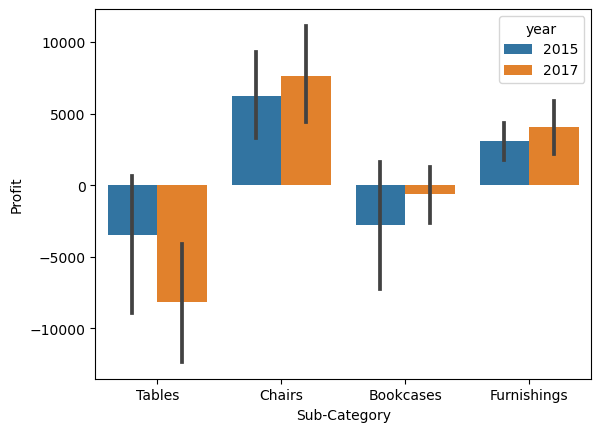

In [131]:
#which categories he lose on it ?
sns.barplot(x='Sub-Category' , y='Profit' , estimator=sum , data=df[((df['year']==2017) | (df['year']==2015)) & (df['Category']=='Furniture')] , hue='year')

In [133]:
df.groupby(['year'])['Profit'].sum().sort_values(ascending=False)

year
2017    93439.2696
2016    81795.1743
2015    61618.6037
2014    49543.9741
Name: Profit, dtype: float64

In [141]:
print(93439.2696-81795.1743) # 2017-2016
print(81795.1743-61618.6037) #2016-2015
print(61618.6037-49543.9741) # 2015-2014

11644.0953
20176.5706
12074.6296


In [142]:
sum([11644.0953 ,20176.5706 ,12074.6296 ])/3 # He Make 14631.76 Profit Plus every year 

14631.765166666666

In [382]:
df.head(1)

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Sell_Price,year,time_shipping_spent,month
0,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,482.0064,2016,3,11


<AxesSubplot:xlabel='Sales', ylabel='Sub-Category'>

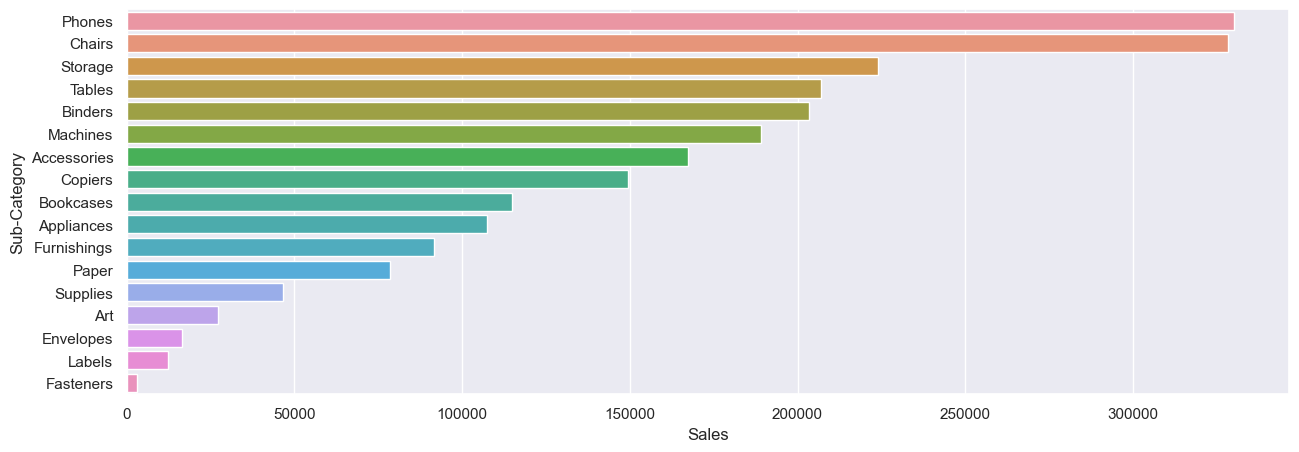

In [385]:
df_category_sal=pd.DataFrame(df.groupby(['Sub-Category'])['Sales'].sum().sort_values(ascending=False)) # The best Sub-gategories Sales
sns.barplot(x='Sales' , y=df_category_sal.index , data=df_category_sal)

<AxesSubplot:xlabel='Profit', ylabel='Sub-Category'>

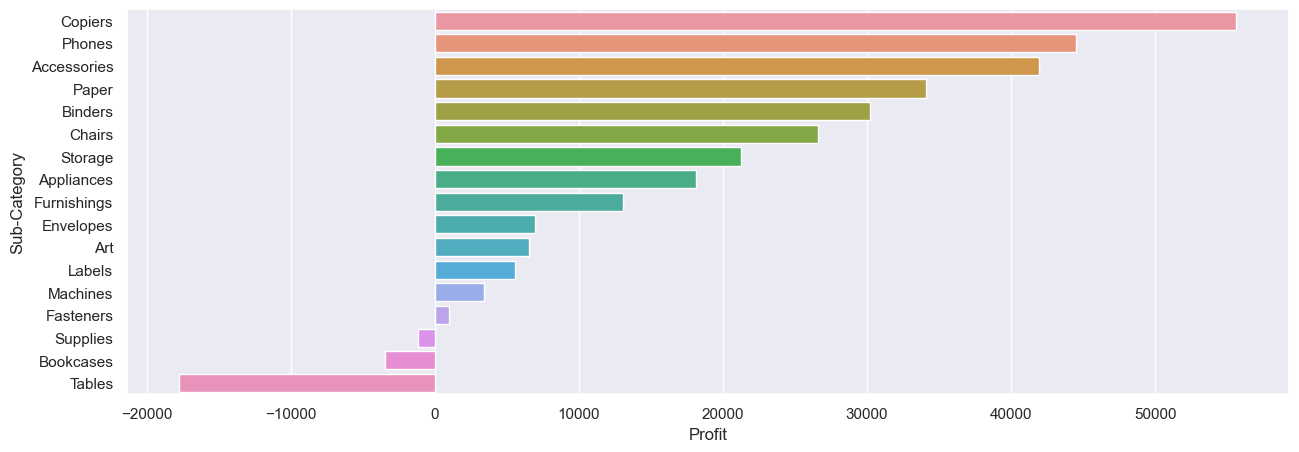

In [386]:
df_category_Profit=pd.DataFrame(df.groupby(['Sub-Category'])['Profit'].sum().sort_values(ascending=False)) # The best Sub-gategories Profites
sns.barplot(x='Profit' , y=df_category_Profit.index , data=df_category_Profit)

In [162]:
# Convert time_shipping_spent from datetime to integer .
df["time_shipping_spent"] = (df["time_shipping_spent"]).dt.days
df

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Sell_Price,year,time_shipping_spent
0,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,482.006400,2016,3
1,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,1976.238000,2016,3
2,2016-06-12,2016-06-16,Second Class,Darrin Van Huff,Corporate,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,22.368600,2016,4
3,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,3016.369125,2015,7
4,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,33.272400,2015,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,2014-01-21,2014-01-23,Second Class,Tom Boeckenhauer,Consumer,Miami,Florida,South,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028,56.492400,2014,2
9990,2017-02-26,2017-03-03,Standard Class,Dave Brooks,Consumer,Costa Mesa,California,West,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332,168.286800,2017,5
9991,2017-02-26,2017-03-03,Standard Class,Dave Brooks,Consumer,Costa Mesa,California,West,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932,394.328400,2017,5
9992,2017-02-26,2017-03-03,Standard Class,Dave Brooks,Consumer,Costa Mesa,California,West,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200,105.080000,2017,5


In [167]:
df[df['Category']=='Technology']['Profit'].sum() # He Makes 145454.9 $ profit for technology in all years

145454.94809999998

<AxesSubplot:xlabel='Sub-Category', ylabel='Profit'>

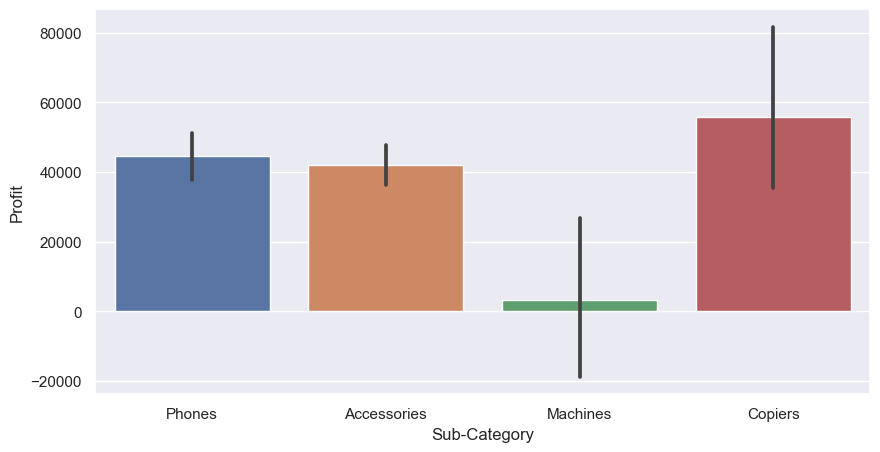

In [393]:
sns.barplot(x='Sub-Category' , y='Profit' , data=df[df['Category']=='Technology'] , estimator=sum) # Technology Category

In [509]:
df[(df['Sub-Category']=='Machines') & (df['Profit']<0)]['Profit'].sum() # He loss in machines -30,118.66 for all years

-30118.668200000004

In [510]:
df[(df['Sub-Category']=='Machines') & (df['Profit']>0)]['Profit'].sum() # He Makes in machines 33,503.4251 for all years 

33503.4251

In [512]:
df[(df['Sub-Category']=='Machines') & (df['Profit']>0)]['Profit'].sum() + (df[(df['Sub-Category']=='Machines') & (df['Profit']<0)]['Profit'].sum()) # General formula for how much he make in Machines

3384.7568999999967

<AxesSubplot:xlabel='year', ylabel='Profit'>

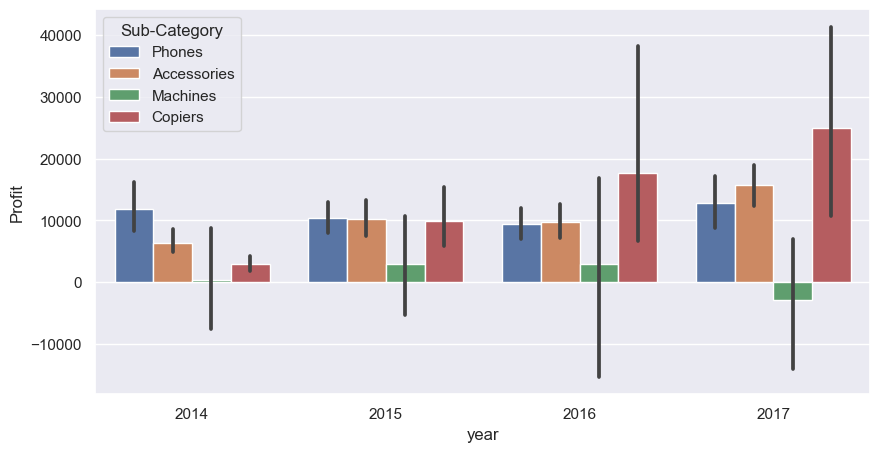

In [323]:
sns.set(rc={'figure.figsize':(10,5)}) # In technology Category during year
sns.barplot(x='year' , y='Profit' , data=df[df['Category']=='Technology'] , estimator=sum , hue='Sub-Category') # The machines sub-category has less profit !

In [173]:
df[df['Sub-Category']=='Machines']['Profit'].sum() # He makes 3384 profit only on machines for all years!

3384.756899999989

In [177]:
df[df['Category']=='Technology'].groupby(['Sub-Category'])['Profit'].sum()

Sub-Category
Accessories    41936.6357
Copiers        55617.8249
Machines        3384.7569
Phones         44515.7306
Name: Profit, dtype: float64

In [185]:
df_negative_prof[df_negative_prof['Sub-Category']=='Machines']['Profit'].sum() # He make negative profit on machines around -30118.668 for all years

-30118.668200000004

<AxesSubplot:xlabel='year', ylabel='Profit'>

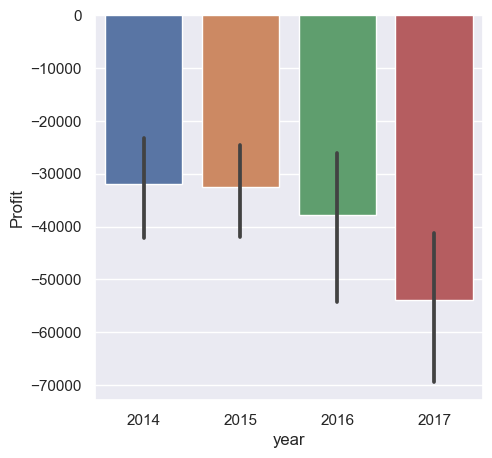

In [395]:
sns.set(rc={'figure.figsize':(5,5)})
sns.barplot(x='year' , y='Profit' , data=df_negative_prof , estimator=sum)

<AxesSubplot:xlabel='year', ylabel='Profit'>

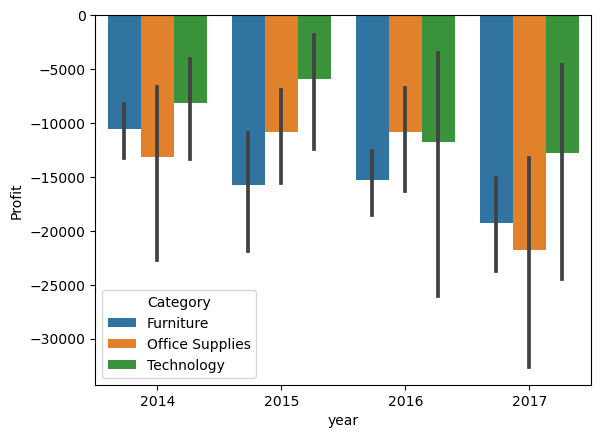

In [192]:
sns.barplot(x='year' , y='Profit' , data=df_negative_prof , estimator=sum , hue='Category')

In [194]:
df[df['Category']=='Office Supplies'].groupby(['Sub-Category'])['Profit'].sum()

Sub-Category
Appliances    18138.0054
Art            6527.7870
Binders       30221.7633
Envelopes      6964.1767
Fasteners       949.5182
Labels         5546.2540
Paper         34053.5693
Storage       21278.8264
Supplies      -1189.0995
Name: Profit, dtype: float64

<AxesSubplot:xlabel='year', ylabel='Profit'>

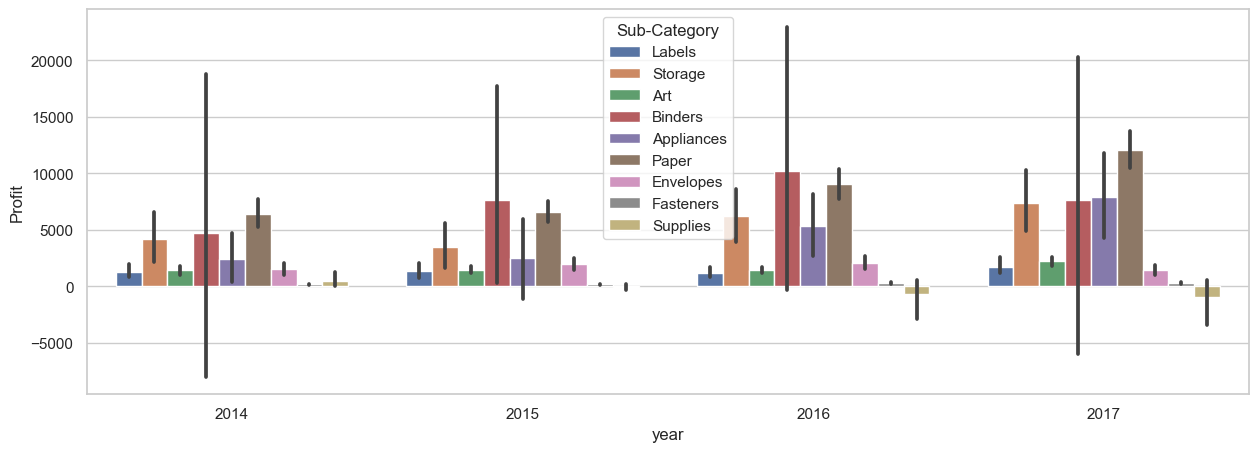

In [306]:
sns.set(rc={'figure.figsize':(15,5)})
sns.set_theme(style="whitegrid")
sns.barplot(x='year' , y='Profit' , data=df[df['Category']=='Office Supplies'] , estimator=sum , hue='Sub-Category') # Grapgh for Office suppliers

/Users/immortal/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sales'>

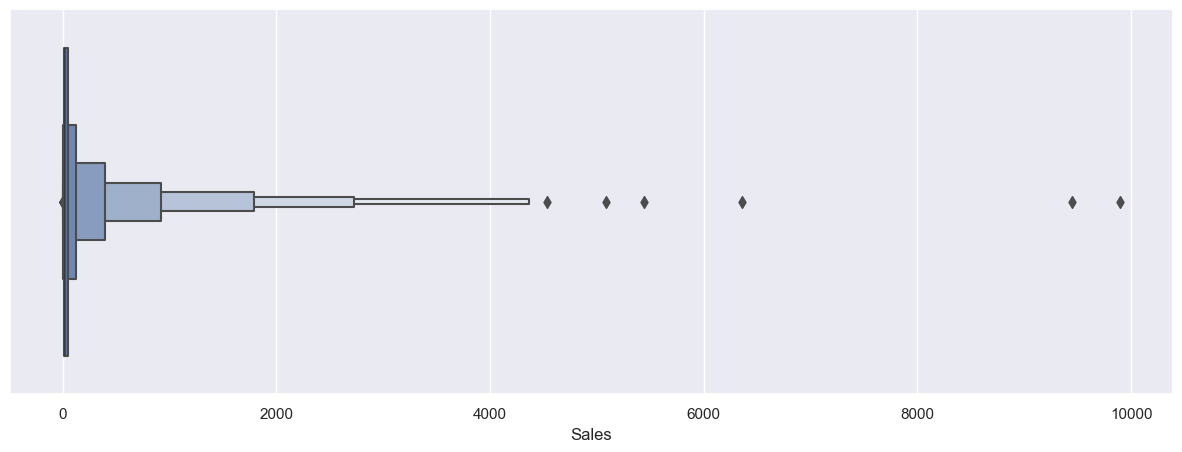

In [218]:
sns.boxenplot(df[df['Sub-Category']=='Binders']['Sales']) # Its seems like there is outliers in Binders

In [224]:
df[(df['Sub-Category']=='Binders')]['Product Name'].value_counts()

Avery Non-Stick Binders                                       20
Storex Dura Pro Binders                                       17
GBC Premium Transparent Covers with Diagonal Lined Pattern    14
Ibico Plastic Spiral Binding Combs                            13
Wilson Jones Turn Tabs Binder Tool for Ring Binders           13
                                                              ..
Fellowes Presentation Covers for Comb Binding Machines         2
GBC Therma-A-Bind 250T Electric Binding System                 2
Durable Pressboard Binders                                     2
Wilson Jones Hanging Recycled Pressboard Data Binders          2
Wilson Jones DublLock D-Ring Binders                           2
Name: Product Name, Length: 211, dtype: int64

In [233]:
df.pivot_table(values='Profit', index='year' , columns='Sub-Category' , aggfunc='sum') # Piviot table shows The sub Getgoreis with negative and positive Profit idexed by Year .

Sub-Category,Accessories,Appliances,Art,Binders,Bookcases,Chairs,Copiers,Envelopes,Fasteners,Furnishings,Labels,Machines,Paper,Phones,Storage,Supplies,Tables
year,,,,,,,,,,,,,,,,,
2014,6402.7150,2459.4999,1406.8031,4739.7160,-346.1707,6955.0470,2912.9433,1495.4788,178.5583,1972.8919,1286.0042,369.1689,6371.0214,11808.0053,4166.2788,490.0556,-3124.0427
2015,10197.2752,2511.8957,1485.0582,7596.6714,-2755.2302,6228.4161,9930.2988,1960.1906,171.9376,3051.8189,1323.0286,2977.4856,6570.1700,10398.8074,3505.4601,-24.8784,-3509.8019
2016,9664.2885,5301.3415,1413.9626,10215.6341,212.4710,5763.1539,17742.7926,2066.7483,294.0734,3935.2700,1192.6119,2907.3180,9071.5345,9459.5929,6204.2868,-698.9639,-2950.9418
2017,15672.3570,7865.2683,2221.9631,7669.7418,-583.6261,7643.5493,25031.7902,1441.7590,304.9489,4099.1628,1744.6093,-2869.2156,12040.8434,12849.3250,7402.8007,-955.3128,-8140.6947


In [235]:
df.head()

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Sell_Price,year,time_shipping_spent
0,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,482.006400,2016,3
1,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,1976.238000,2016,3
2,2016-06-12,2016-06-16,Second Class,Darrin Van Huff,Corporate,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,22.368600,2016,4
3,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,3016.369125,2015,7
4,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,33.272400,2015,7


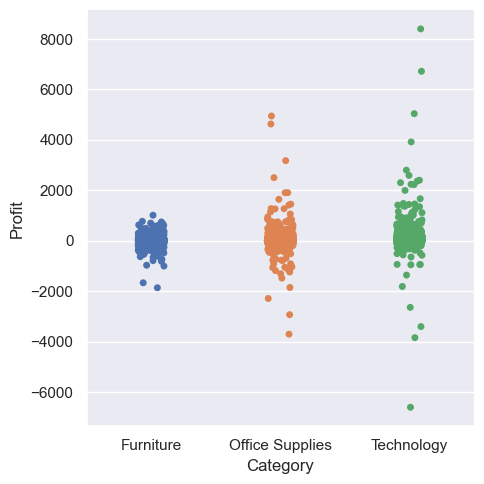

In [374]:
sns.catplot(x='Category' , y='Profit' , data=df , estimator=sum) # Here we can handle the furniture category !

In [297]:
df_best_sub_categories=pd.DataFrame(df.groupby(['Sub-Category'])[['Sales', 'Profit']].sum().sort_values('Sales',ascending=False)) # Table that shows every sub-category sales and how much profit he gets 
df_best_sub_categories

,Sales,Profit
Sub-Category,,
Phones,330007.0540,44515.7306
Chairs,328449.1030,26590.1663
Storage,223843.6080,21278.8264
Tables,206965.5320,-17725.4811
Binders,203412.7330,30221.7633
Machines,189238.6310,3384.7569
Accessories,167380.3180,41936.6357
Copiers,149528.0300,55617.8249
Bookcases,114879.9963,-3472.5560


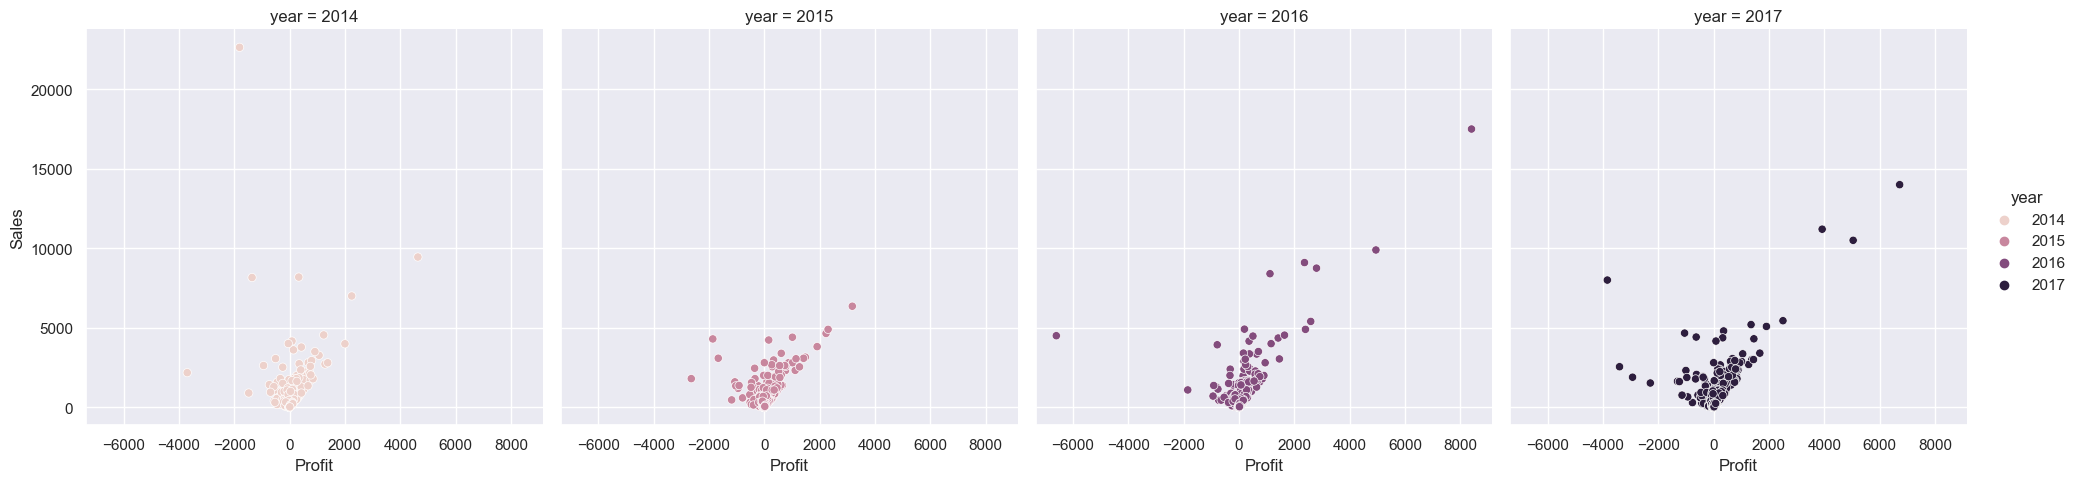

In [376]:
sns.relplot(data=df, x="Profit", y="Sales" , hue='year' , col='year' )

In [285]:
df.head()

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Sell_Price,year,time_shipping_spent
0,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,482.006400,2016,3
1,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,1976.238000,2016,3
2,2016-06-12,2016-06-16,Second Class,Darrin Van Huff,Corporate,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,22.368600,2016,4
3,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,3016.369125,2015,7
4,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,33.272400,2015,7


In [287]:
df['State'].unique()

array(['Kentucky', 'California', 'Florida', 'North Carolina',
       'Washington', 'Texas', 'Wisconsin', 'Utah', 'Nebraska',
       'Pennsylvania', 'Illinois', 'Minnesota', 'Michigan', 'Delaware',
       'Indiana', 'New York', 'Arizona', 'Virginia', 'Tennessee',
       'Alabama', 'South Carolina', 'Oregon', 'Colorado', 'Iowa', 'Ohio',
       'Missouri', 'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut',
       'New Jersey', 'Massachusetts', 'Georgia', 'Nevada', 'Rhode Island',
       'Mississippi', 'Arkansas', 'Montana', 'New Hampshire', 'Maryland',
       'District of Columbia', 'Kansas', 'Vermont', 'Maine',
       'South Dakota', 'Idaho', 'North Dakota', 'Wyoming',
       'West Virginia'], dtype=object)

In [296]:
df_best_cities=pd.DataFrame(df.groupby(['City'])['Profit'].sum().sort_values(ascending=False)[0:10])
df_best_cities

,Profit
City,
New York City,62036.9837
Los Angeles,30440.7579
Seattle,29156.0967
San Francisco,17507.3854
Detroit,13181.7908
Lafayette,10018.3876
Jackson,7581.6828
Atlanta,6993.6629
Minneapolis,6824.5846


<AxesSubplot:xlabel='City', ylabel='Profit'>

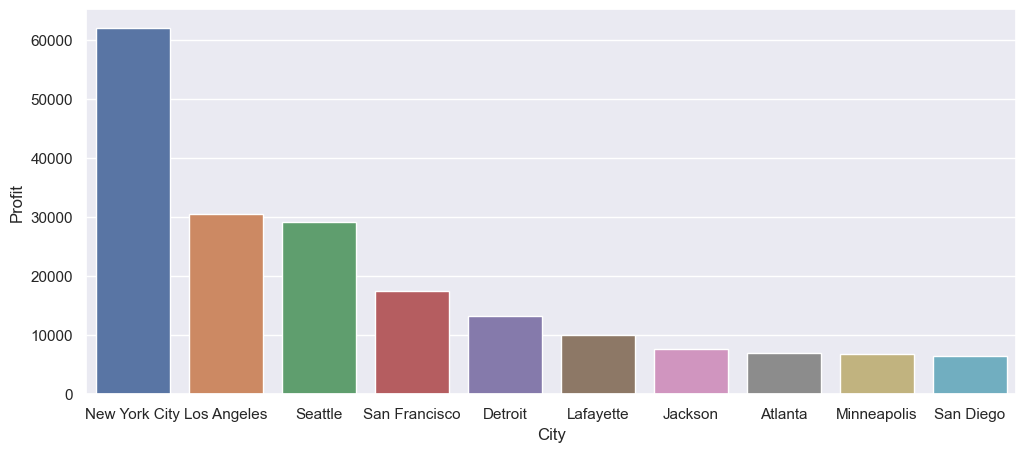

In [321]:
sns.set(rc={'figure.figsize':(12,5)})
sns.barplot(data=df_best_cities , x=df_best_cities.index ,y=df_best_cities.Profit)

In [324]:
df.head()

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Sell_Price,year,time_shipping_spent
0,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,482.006400,2016,3
1,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,1976.238000,2016,3
2,2016-06-12,2016-06-16,Second Class,Darrin Van Huff,Corporate,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,22.368600,2016,4
3,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,3016.369125,2015,7
4,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,33.272400,2015,7


In [325]:
df['month']=df['Order Date'].dt.month
df.head()

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Sell_Price,year,time_shipping_spent,month
0,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,482.006400,2016,3,11
1,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,1976.238000,2016,3,11
2,2016-06-12,2016-06-16,Second Class,Darrin Van Huff,Corporate,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,22.368600,2016,4,6
3,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,3016.369125,2015,7,10
4,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,33.272400,2015,7,10


In [378]:
pd.pivot_table(df,index=['year'],columns='month',values='Profit',aggfunc='sum') # Piviot table that shwos profit per year pear month

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2014,2450.1907,862.3084,498.7299,3488.8352,2738.7096,4976.5244,-841.4826,5318.1050,8328.0994,3448.2573,9292.1269,8983.5699
2015,-3281.0070,2813.8508,9732.0978,4187.4962,4667.8690,3335.5572,3288.6483,5355.8084,8209.1627,2817.3660,12474.7884,8016.9659
2016,2824.8233,5004.5795,3611.9680,2977.8149,8662.1464,4750.3781,4432.8779,2062.0693,9328.6576,16243.1425,4011.4075,17885.3093
2017,7140.4391,1613.8720,14751.8915,933.2900,6342.5828,8223.3357,6952.6212,9040.9557,10991.5556,9275.2755,9690.1037,8483.3468


In [348]:
pd.pivot_table(df,index=['year','Category'],columns='month',values='Profit',aggfunc='sum')# Piviot table that shwos profit per year pear month with Categories

month                        1          2           3          4          5   \
year Category                                                                  
2014 Furniture         805.4665   120.6917  -1128.6550   554.3801  -349.8776   
     Office Supplies   788.9506   176.0910   1270.4133  1000.2086  1747.2044   
     Technology        855.7736   565.5257    356.9716  1934.2465  1341.3828   
2015 Furniture       -3014.2000   394.8948   1455.0573   338.6502   900.5847   
     Office Supplies   589.8969  1814.1018   5407.8482  1477.3596  1731.6139   
     Technology       -856.7039   604.8542   2869.1923  2371.4864  2035.6704   
2016 Furniture         303.9607   377.0352   -555.2680   364.8334  1824.4739   
     Office Supplies  1604.4712  1330.0009   1061.4056 -1100.4821  2397.5024   
     Technology        916.3914  3297.5434   3105.8304  3713.4636  4440.1701   
2017 Furniture         -39.4402  -199.0421   1000.8532   202.4624   -72.8829   
     Office Supplies  3260.4467   953.8253   2715.9624  3370.6015  3153.7260   
     Technology       3919.4326   859.0888  11035.0759 -2639.7739  3261.7397   

month                        6          7          8          9           10  \
year Category                                                                  
2014 Furniture         596.3153   374.2467   663.4717  1858.5976    249.1645   
     Office Supplies  3031.4326 -2482.0172  2767.6007  6699.5402   1117.6406   
     Technology       1348.7765  1266.2879  1887.0326  -230.0384   2081.4522   
2015 Furniture        -412.6597  -325.0938  -487.4709  1350.1185   -605.5163   
     Office Supplies  2195.3864  1113.7829  2208.7531  2037.8837   1090.9375   
     Technology       1552.8305  2499.9592  3634.5262  4821.1605   2331.9448   
2016 Furniture        -106.2665  1038.9073  -494.1457   702.6025   -144.6600   
     Office Supplies  2467.4894  1123.9602  1629.1913  3714.0417   4680.0550   
     Technology       2389.1552  2270.0104   927.0237  4912.0134  11707.7475   
2017 Furniture         904.9956   324.6244   322.2390  1548.6837  -2526.9203   
     Office Supplies  3378.9821  2563.2845  6067.8582  4847.7438   4040.7751   
     Technology       3939.3580  4064.7123  2650.8585  4595.1281   7761.4207   

month                        11          12  
year Category                                
2014 Furniture        -297.8958   2011.8198  
     Office Supplies  4411.9560   2064.3953  
     Technology       5178.0667   4907.3548  
2015 Furniture        2992.0240    428.8141  
     Office Supplies  2800.0289   2631.9409  
     Technology       6682.7355   4956.2109  
2016 Furniture         819.8088   2828.6715  
     Office Supplies  4686.9250  11466.6686  
     Technology      -1495.3263   3589.9692  
2017 Furniture         406.0637   1146.7548  
     Office Supplies  3609.1029   1774.3132  
     Technology       5674.9371   5562.2788

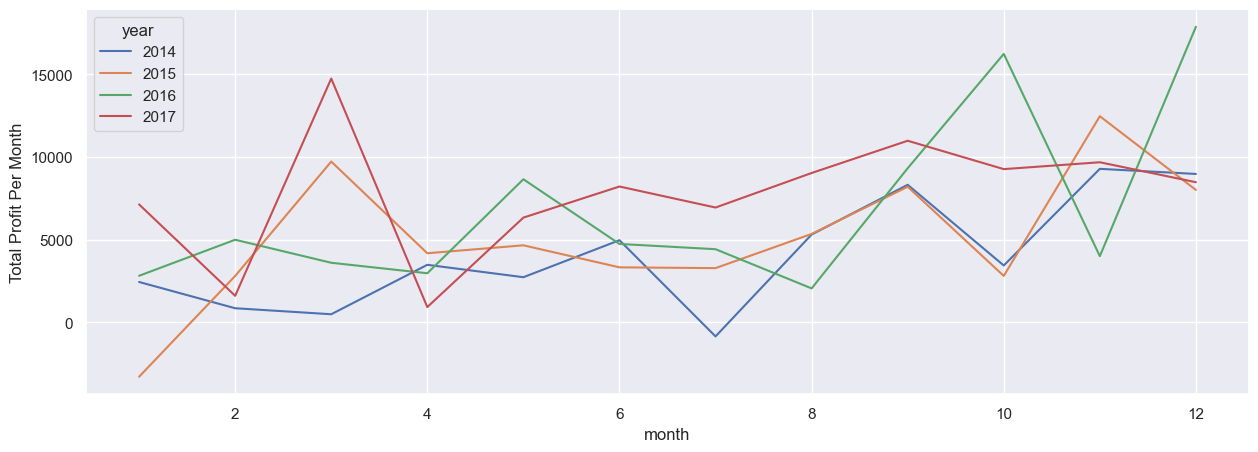

In [377]:
pd.pivot_table(mmdf,index=['month'],columns='year',values='Profit',aggfunc='sum').plot() # Plot shwos the profit during months in all years
plt.ylabel('Total Profit Per Month');

In [521]:
df[df['year']==2014].groupby(['month'])['Profit'].sum().sort_values(ascending=False)

month
11    9292.1269
12    8983.5699
9     8328.0994
8     5318.1050
6     4976.5244
4     3488.8352
10    3448.2573
5     2738.7096
1     2450.1907
2      862.3084
3      498.7299
7     -841.4826
Name: Profit, dtype: float64

In [522]:
df[df['year']==2015].groupby(['month'])['Profit'].sum().sort_values(ascending=False)

month
11    12474.7884
3      9732.0978
9      8209.1627
12     8016.9659
8      5355.8084
5      4667.8690
4      4187.4962
6      3335.5572
7      3288.6483
10     2817.3660
2      2813.8508
1     -3281.0070
Name: Profit, dtype: float64

In [523]:
df[df['year']==2016].groupby(['month'])['Profit'].sum().sort_values(ascending=False)

month
12    17885.3093
10    16243.1425
9      9328.6576
5      8662.1464
2      5004.5795
6      4750.3781
7      4432.8779
11     4011.4075
3      3611.9680
4      2977.8149
1      2824.8233
8      2062.0693
Name: Profit, dtype: float64

In [524]:
df[df['year']==2017].groupby(['month'])['Profit'].sum().sort_values(ascending=False)

month
3     14751.8915
9     10991.5556
11     9690.1037
10     9275.2755
8      9040.9557
12     8483.3468
6      8223.3357
1      7140.4391
7      6952.6212
5      6342.5828
2      1613.8720
4       933.2900
Name: Profit, dtype: float64

In [379]:
df.head()

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Sell_Price,year,time_shipping_spent,month
0,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,482.006400,2016,3,11
1,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,1976.238000,2016,3,11
2,2016-06-12,2016-06-16,Second Class,Darrin Van Huff,Corporate,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,22.368600,2016,4,6
3,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,3016.369125,2015,7,10
4,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,33.272400,2015,7,10


In [397]:
df.groupby(['Segment','Category'])['Profit'].sum()

Segment      Category       
Consumer     Furniture           6991.0786
             Office Supplies    56330.3210
             Technology         70797.8096
Corporate    Furniture           7584.8158
             Office Supplies    40227.3202
             Technology         44166.9980
Home Office  Furniture           3875.3784
             Office Supplies    25933.1596
             Technology         30490.1405
Name: Profit, dtype: float64

<AxesSubplot:xlabel='Segment', ylabel='Sales'>

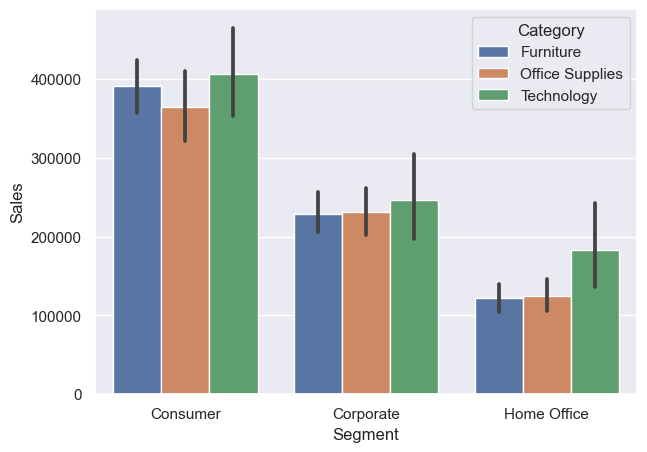

In [411]:
sns.barplot(x='Segment' , y='Sales' , estimator=sum , data=df , hue='Category') 

<AxesSubplot:xlabel='Segment', ylabel='Profit'>

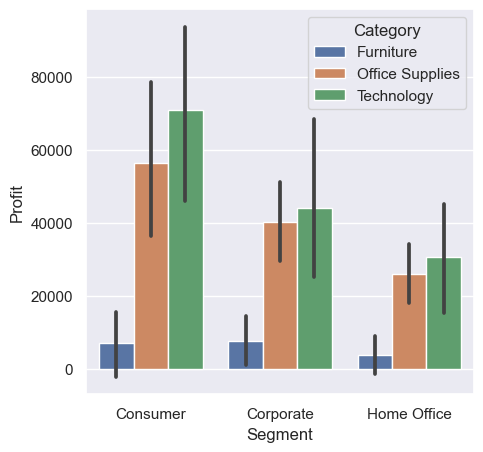

In [402]:
sns.barplot(x='Segment' , y='Profit' , estimator=sum , data=df , hue='Category') # What is the best Segment has more Profit ?

/Users/immortal/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Ship Mode', ylabel='count'>

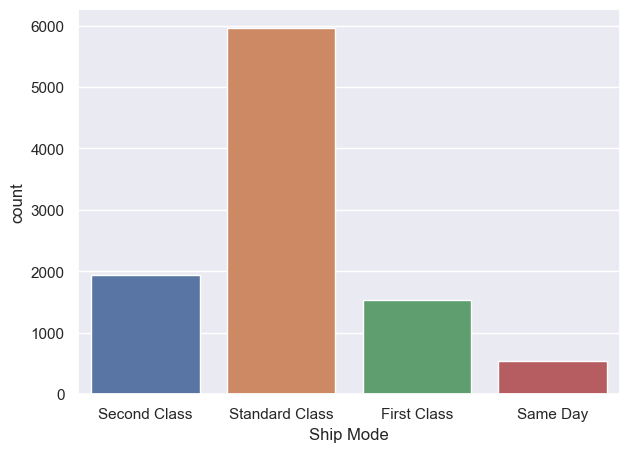

In [405]:
# What is the best shipment is most used?
sns.set(rc={'figure.figsize':(7,5)})
sns.countplot(df['Ship Mode'])

In [413]:
df.head()

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Sell_Price,year,time_shipping_spent,month
0,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,482.006400,2016,3,11
1,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,1976.238000,2016,3,11
2,2016-06-12,2016-06-16,Second Class,Darrin Van Huff,Corporate,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,22.368600,2016,4,6
3,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,3016.369125,2015,7,10
4,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,33.272400,2015,7,10


<AxesSubplot:title={'center':'Most Region Profit'}, ylabel='Profit'>

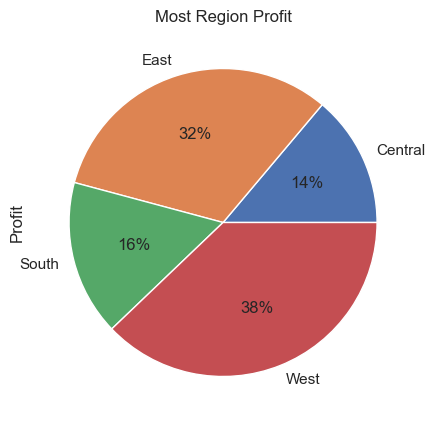

In [430]:
df.groupby(['Region'])['Profit'].sum().plot(kind='pie', y='Region' , autopct='%1.0f%%' , title='Most Region Profit') # The most Regions that has most Profit


<AxesSubplot:title={'center':'Most Region Sales'}, ylabel='Sales'>

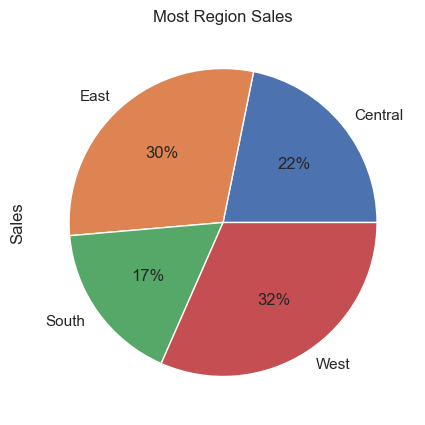

In [439]:
df.groupby(['Region'])['Sales'].sum().plot(kind='pie', y='Region' , autopct='%1.0f%%' , title='Most Region Sales')

<AxesSubplot:xlabel='Region', ylabel='Profit'>

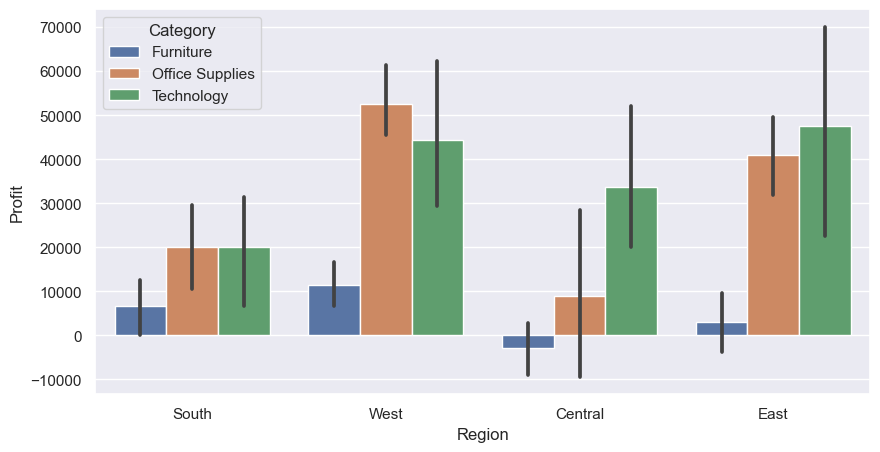

In [438]:
sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(x='Region' , y='Profit' , data=df , estimator=sum , hue='Category')

In [441]:
df.head()

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Sell_Price,year,time_shipping_spent,month
0,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,482.006400,2016,3,11
1,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,1976.238000,2016,3,11
2,2016-06-12,2016-06-16,Second Class,Darrin Van Huff,Corporate,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,22.368600,2016,4,6
3,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,3016.369125,2015,7,10
4,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,33.272400,2015,7,10


## Deal with Outliers

In [444]:
IQR=df['Sales'].quantile(0.75)-df['Sales'].quantile(0.25)
IQR

192.66

In [455]:
upper_limit=df['Sales'].quantile(0.75)+(2.5*IQR)
lower_limit=df['Sales'].quantile(0.25)-(2.5*IQR)
upper_limit,lower_limit

(691.5899999999999, -464.37)

In [456]:
df_clean=df[(df['Sales']<=upper_limit)|(df['Sales']<=lower_limit)] # New data frame with remove all the outliers
df_clean

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Sell_Price,year,time_shipping_spent,month
0,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960,2,0.0,41.9136,482.0064,2016,3,11
2,2016-06-12,2016-06-16,Second Class,Darrin Van Huff,Corporate,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,0.0,6.8714,22.3686,2016,4,6
4,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368,2,0.2,2.5164,33.2724,2015,7,10
5,2014-06-09,2014-06-14,Standard Class,Brosina Hoffman,Consumer,Los Angeles,California,West,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.860,7,0.0,14.1694,327.8506,2014,5,6
6,2014-06-09,2014-06-14,Standard Class,Brosina Hoffman,Consumer,Los Angeles,California,West,Office Supplies,Art,Newell 322,7.280,4,0.0,1.9656,27.1544,2014,5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,2014-01-21,2014-01-23,Second Class,Tom Boeckenhauer,Consumer,Miami,Florida,South,Furniture,Furnishings,Ultra Door Pull Handle,25.248,3,0.2,4.1028,56.4924,2014,2,1
9990,2017-02-26,2017-03-03,Standard Class,Dave Brooks,Consumer,Costa Mesa,California,West,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,15.6332,168.2868,2017,5,2
9991,2017-02-26,2017-03-03,Standard Class,Dave Brooks,Consumer,Costa Mesa,California,West,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932,394.3284,2017,5,2
9992,2017-02-26,2017-03-03,Standard Class,Dave Brooks,Consumer,Costa Mesa,California,West,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200,105.0800,2017,5,2


/Users/immortal/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Sales'>

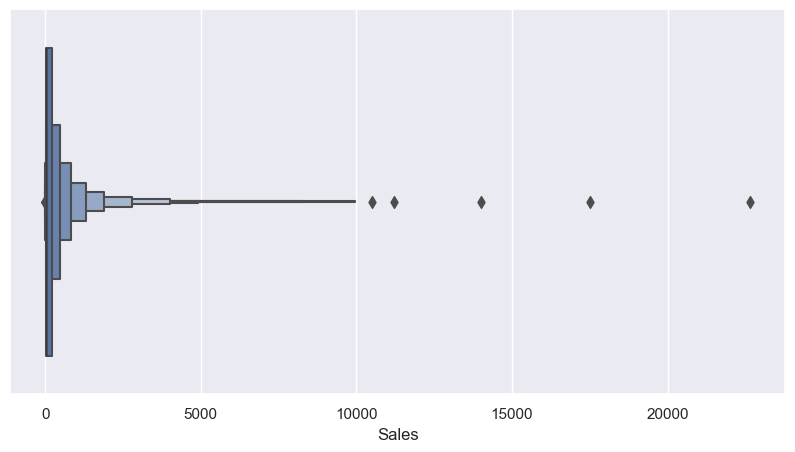

In [457]:
sns.boxenplot(df['Sales'])

/Users/immortal/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Sales'>

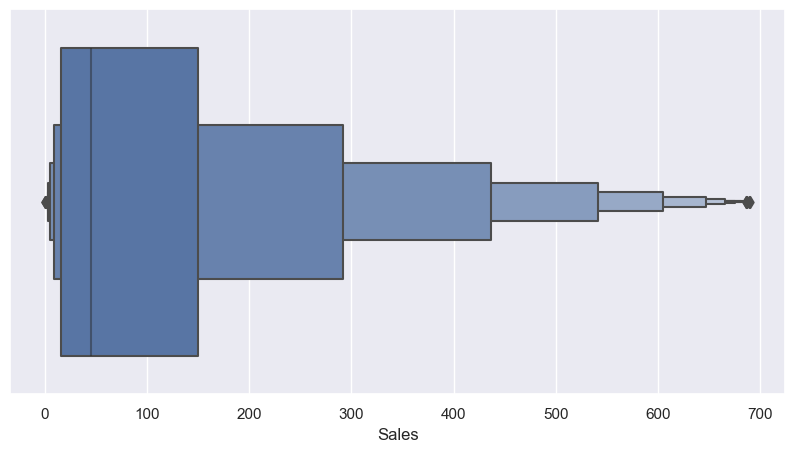

In [458]:
sns.boxenplot(df_clean['Sales'])

In [459]:
df_outliers=df[~(df['Sales']<=upper_limit)|(df['Sales']<=lower_limit)] # New data frame with all the outliers
df_outliers

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Sell_Price,year,time_shipping_spent,month
1,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,1976.238000,2016,3,11
3,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,3016.369125,2015,7,10
7,2014-06-09,2014-06-14,Standard Class,Brosina Hoffman,Consumer,Los Angeles,California,West,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520,6,0.20,90.7152,4263.614400,2014,5,6
10,2014-06-09,2014-06-14,Standard Class,Brosina Hoffman,Consumer,Los Angeles,California,West,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092,12199.215600,2014,5,6
11,2014-06-09,2014-06-14,Standard Class,Brosina Hoffman,Consumer,Los Angeles,California,West,Technology,Phones,Konftel 250 Conference phone - Charcoal black,911.4240,4,0.20,68.3568,2848.200000,2014,5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9929,2016-09-04,2016-09-04,Same Day,Ionia McGrath,Consumer,San Francisco,California,West,Technology,Copiers,Canon PC1060 Personal Laser Copier,2799.9600,5,0.20,944.9865,10254.853500,2016,0,9
9942,2014-12-28,2015-01-03,Standard Class,Maribeth Dona,Consumer,Anaheim,California,West,Office Supplies,Storage,"Carina Mini System Audio Rack, Model AR050B",998.8200,9,0.00,29.9646,8959.415400,2014,6,12
9947,2017-06-01,2017-06-03,Second Class,Helen Wasserman,Corporate,Indianapolis,Indiana,Central,Furniture,Chairs,Hon 4070 Series Pagoda Round Back Stacking Chairs,1925.8800,6,0.00,539.2464,11016.033600,2017,2,6
9948,2017-06-01,2017-06-03,Second Class,Helen Wasserman,Corporate,Indianapolis,Indiana,Central,Office Supplies,Appliances,Honeywell Enviracaire Portable HEPA Air Cleane...,2405.2000,8,0.00,793.7160,18447.884000,2017,2,6


In [460]:
df_outliers['Profit'].sum()

169605.94179999997

In [461]:
df_clean['Profit'].sum()

116791.07989999998

<AxesSubplot:xlabel='Category', ylabel='Profit'>

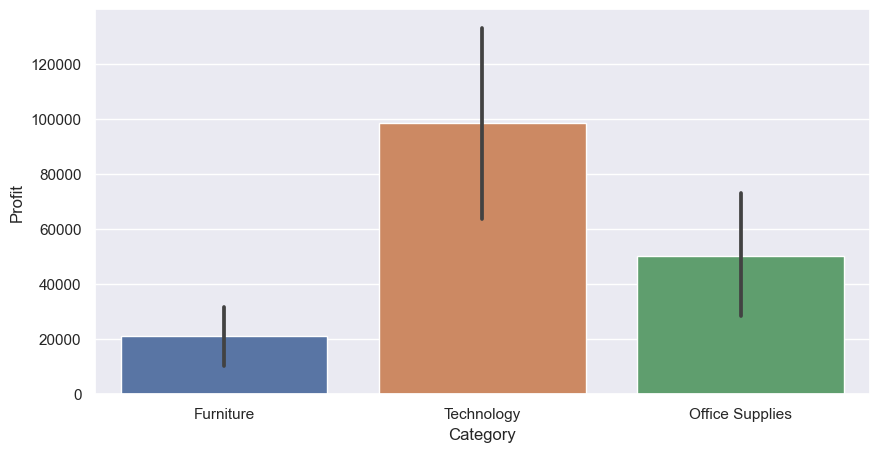

In [470]:
sns.barplot(x='Category' , y='Profit' , estimator=sum , data=df_outliers ) # He Make more profit in outliers technology 

<AxesSubplot:xlabel='Category', ylabel='Profit'>

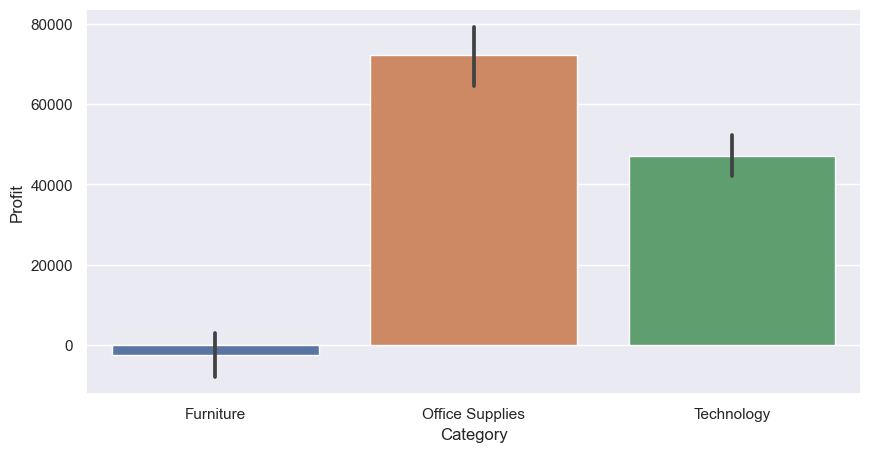

In [467]:
sns.barplot(x='Category' , y='Profit' , estimator=sum , data=df_clean) # He lose Profit in the data without outliers

In [473]:
df_outliers[df_outliers['Profit']<0]['Profit'].sum() # he loss on outliers in range -78,703 

-78703.36570000001

In [474]:
df_clean[df_clean['Profit']<0]['Profit'].sum()

-77427.92000000001

In [475]:
df_outliers[df_outliers['Profit']<0]

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Sell_Price,year,time_shipping_spent,month
3,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,3016.369125,2015,7,10
27,2015-09-17,2015-09-21,Standard Class,Tracy Blumstein,Consumer,Philadelphia,Pennsylvania,East,Furniture,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",3083.4300,7,0.50,-1665.0522,12457.057200,2015,4,9
72,2015-04-26,2015-05-02,Standard Class,Joel Eaton,Consumer,Memphis,Tennessee,South,Furniture,Chairs,High-Back Leather Manager's Chair,831.9360,8,0.20,-114.3912,5438.781600,2015,6,4
165,2014-09-08,2014-09-12,Standard Class,Becky Martin,Consumer,San Antonio,Texas,Central,Technology,Machines,Lexmark MX611dhe Monochrome Laser Printer,8159.9520,8,0.40,-1359.9920,40527.761600,2014,4,9
167,2014-09-08,2014-09-12,Standard Class,Becky Martin,Consumer,San Antonio,Texas,Central,Furniture,Chairs,SAFCO Arco Folding Chair,1740.0600,9,0.30,-24.8580,10987.236000,2014,4,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9712,2014-11-05,2014-11-10,Standard Class,Maribeth Dona,Consumer,Philadelphia,Pennsylvania,East,Office Supplies,Storage,Tennsco Double-Tier Lockers,1080.0960,6,0.20,-94.5084,5278.969200,2014,5,11
9748,2014-11-11,2014-11-15,Standard Class,Brosina Hoffman,Consumer,Chicago,Illinois,Central,Furniture,Chairs,Global Commerce Series High-Back Swivel/Tilt C...,797.9440,4,0.30,-56.9960,2291.239200,2014,4,11
9774,2014-07-26,2014-07-30,Standard Class,Luke Foster,Consumer,San Antonio,Texas,Central,Office Supplies,Binders,GBC DocuBind P400 Electric Binding System,2177.5840,8,0.80,-3701.8928,7186.027200,2014,4,7
9787,2017-03-27,2017-04-01,Standard Class,Caroline Jumper,Consumer,Houston,Texas,Central,Furniture,Bookcases,"Atlantic Metals Mobile 5-Shelf Bookcases, Cust...",1023.3320,5,0.32,-30.0980,3509.426800,2017,5,3


In [481]:
df_outliers[df_outliers['Profit']<0].groupby(['Category'])['Profit'].sum()

Category
Furniture         -24363.2342
Office Supplies   -26744.6596
Technology        -27595.4719
Name: Profit, dtype: float64

In [482]:
df_outliers[df_outliers['Profit']>0].groupby(['Category'])['Profit'].sum()

Category
Furniture           45307.8301
Office Supplies     77004.6269
Technology         125996.8505
Name: Profit, dtype: float64

<AxesSubplot:xlabel='year', ylabel='Profit'>

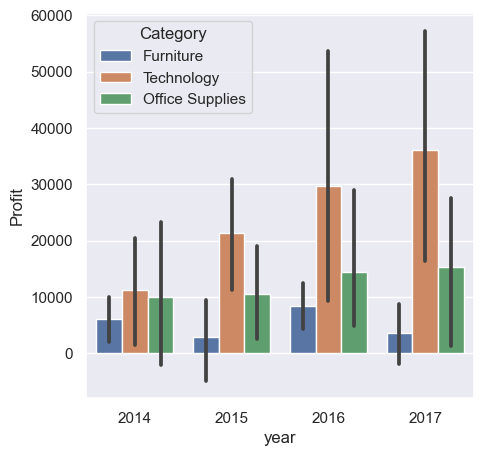

In [487]:
sns.barplot(x='year' , y='Profit' , data=df_outliers , estimator=sum , hue='Category')

In [490]:
df_outliers['Quantity'].value_counts()

5     156
3     114
4     112
7     103
6      79
2      68
9      60
8      50
10     11
13      9
14      7
12      6
11      5
1       4
Name: Quantity, dtype: int64

<AxesSubplot:xlabel='Category', ylabel='Quantity'>

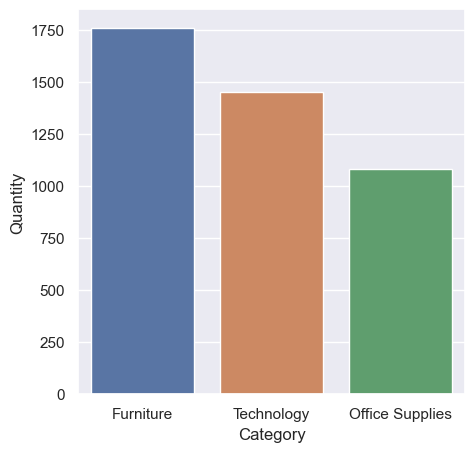

In [496]:
sns.set(rc={'figure.figsize':(5,5)})
df_quantity_=pd.DataFrame(df_outliers.groupby(['Category'])['Quantity'].sum().sort_values(ascending=False))
sns.barplot(data=df_quantity_ , x=df_quantity_.index , y=df_quantity_.Quantity ) # The Furniture has the most quantity and has The more less profit

<AxesSubplot:xlabel='Profit', ylabel='Sub-Category'>

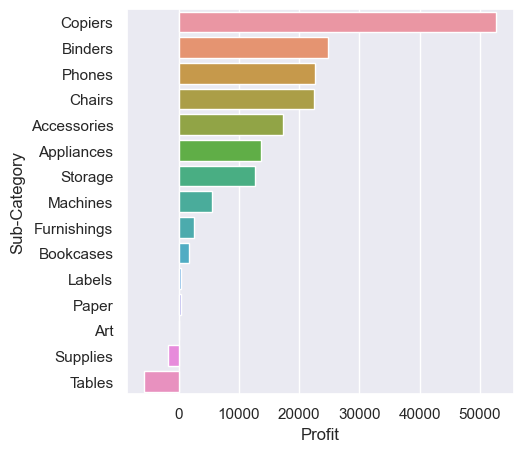

In [497]:
df_category_Profit_outlier=pd.DataFrame(df_outliers.groupby(['Sub-Category'])['Profit'].sum().sort_values(ascending=False)) # The best Sub-gategories Profites
sns.barplot(x='Profit' , y=df_category_Profit_outlier.index , data=df_category_Profit_outlier)

In [513]:
df.head()

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Sell_Price,year,time_shipping_spent,month
0,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,482.006400,2016,3,11
1,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,1976.238000,2016,3,11
2,2016-06-12,2016-06-16,Second Class,Darrin Van Huff,Corporate,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,22.368600,2016,4,6
3,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,3016.369125,2015,7,10
4,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,33.272400,2015,7,10


In [514]:
df['day_order']=df['Order Date'].dt.day
df.head()

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Sell_Price,year,time_shipping_spent,month,day_order
0,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,482.006400,2016,3,11,8
1,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,1976.238000,2016,3,11,8
2,2016-06-12,2016-06-16,Second Class,Darrin Van Huff,Corporate,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,22.368600,2016,4,6,12
3,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,3016.369125,2015,7,10,11
4,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,33.272400,2015,7,10,11


<AxesSubplot:>

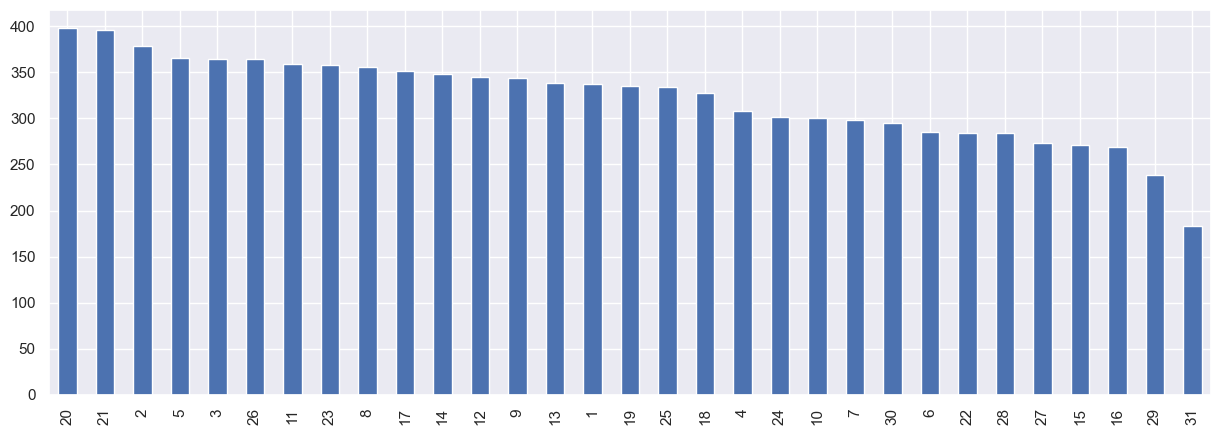

In [569]:
df['day_order'].value_counts().plot(kind='bar') # The most days has orders

<AxesSubplot:>

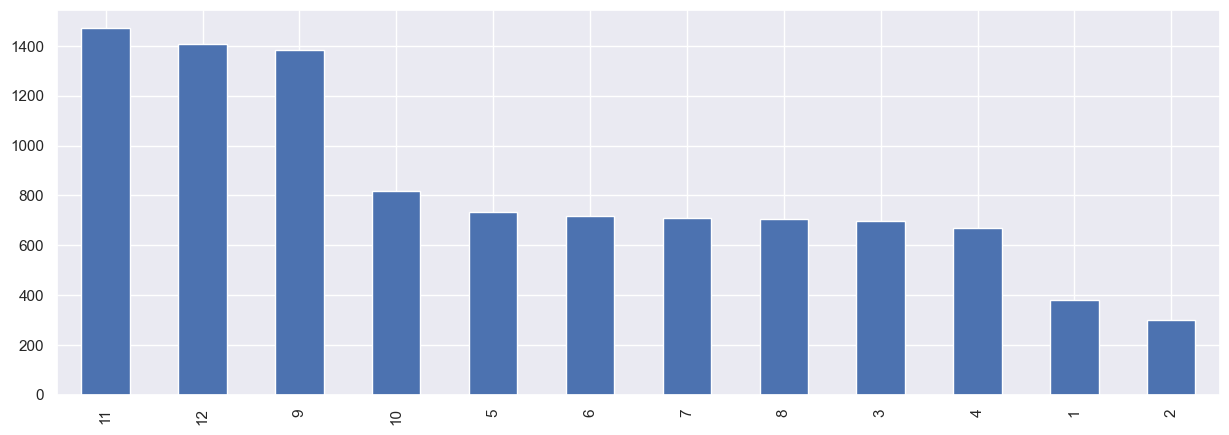

In [567]:
df['month'].value_counts().plot(kind='bar')  # The best months that has orders .

In [518]:
df['month'].value_counts()

11    1471
12    1408
9     1383
10     819
5      735
6      717
7      710
8      706
3      696
4      668
1      381
2      300
Name: month, dtype: int64

In [531]:
df_best_month_profit=pd.DataFrame(df.groupby(['month'])['Profit'].sum().sort_values(ascending=False).reset_index())
df_best_month_profit

,month,Profit
0,12,43369.1919
1,9,36857.4753
2,11,35468.4265
3,10,31784.0413
4,3,28594.6872
5,5,22411.3078
6,8,21776.9384
7,6,21285.7954
8,7,13832.6648
9,4,11587.4363


<AxesSubplot:xlabel='month', ylabel='Profit'>

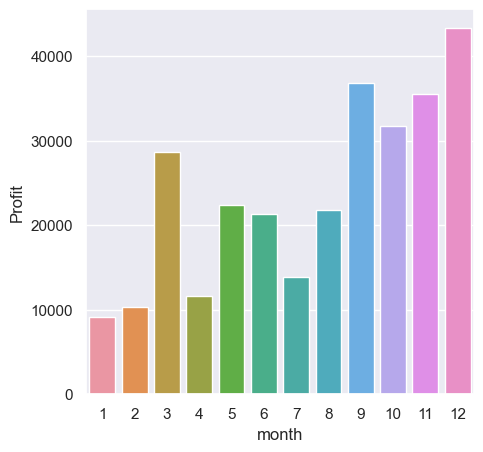

In [533]:
sns.barplot(x='month' , y='Profit' , data=df_best_month_profit , estimator=sum)

<AxesSubplot:xlabel='month', ylabel='Profit'>

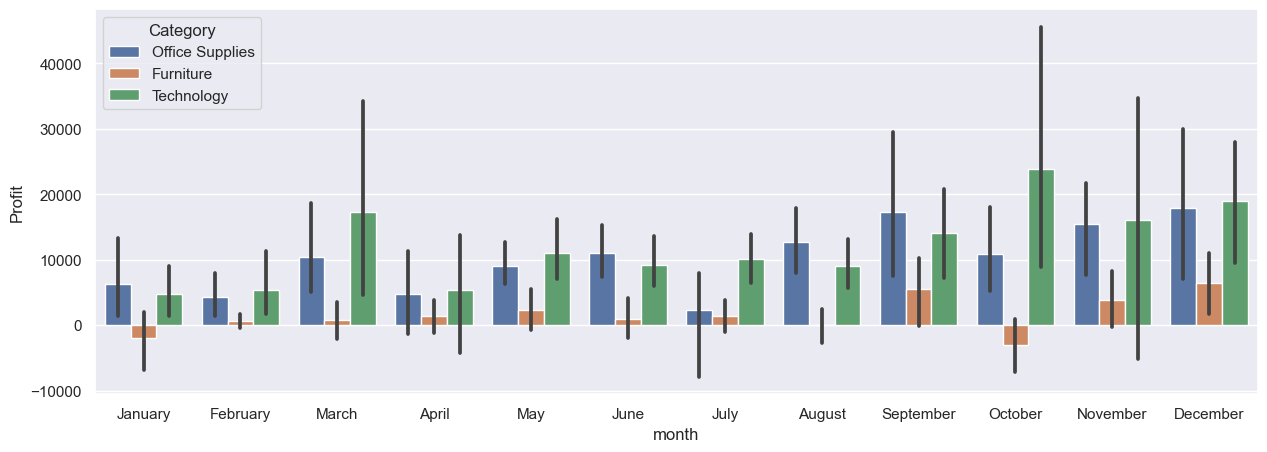

In [594]:
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x='month' , y='Profit' , estimator=sum , data=df_new ,hue='Category')

## Disc

In [539]:
df.head()

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Sell_Price,year,time_shipping_spent,month,day_order
0,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,482.006400,2016,3,11,8
1,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,1976.238000,2016,3,11,8
2,2016-06-12,2016-06-16,Second Class,Darrin Van Huff,Corporate,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,22.368600,2016,4,6,12
3,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,3016.369125,2015,7,10,11
4,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,33.272400,2015,7,10,11


In [540]:
df['Discount'].value_counts()

0.00    4798
0.20    3657
0.70     418
0.80     300
0.30     227
0.40     206
0.60     138
0.10      94
0.50      66
0.15      52
0.32      27
0.45      11
Name: Discount, dtype: int64

In [541]:
df['Profit'].sum()

286397.0216999999

In [543]:
df_negative_prof['Profit'].sum()

-156131.2857

In [544]:
df_positive_prof['Profit'].sum()

442528.30739999993

In [545]:
df['Sales'].sum()

2297200.8603000003

In [549]:
df.groupby(['year' ])['Profit'].sum()

year
2014    49543.9741
2015    61618.6037
2016    81795.1743
2017    93439.2696
Name: Profit, dtype: float64

In [552]:
df[df['year']==2017]['Sales'].sum()

733215.2552

In [557]:
df_new=df_new.sort_values(by='Order Date')
df_new

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Sell_Price,year,time_shipping_spent,month,day_order
7980,2014-01-03,2014-01-07,Standard Class,Darren Powers,Consumer,Houston,Texas,Central,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512,20.7656,2014,4,1,3
739,2014-01-04,2014-01-08,Standard Class,Phillina Ober,Home Office,Naperville,Illinois,Central,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717,24.0099,2014,4,1,4
740,2014-01-04,2014-01-08,Standard Class,Phillina Ober,Home Office,Naperville,Illinois,Central,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748,719.3412,2014,4,1,4
741,2014-01-04,2014-01-08,Standard Class,Phillina Ober,Home Office,Naperville,Illinois,Central,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870,6.9030,2014,4,1,4
1759,2014-01-05,2014-01-12,Standard Class,Mick Brown,Consumer,Philadelphia,Pennsylvania,East,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840,42.0024,2014,7,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5091,2017-12-30,2018-01-03,Standard Class,Jill Matthias,Consumer,Loveland,Colorado,West,Office Supplies,Fasteners,Bagged Rubber Bands,3.024,3,0.2,-0.6048,7.8624,2017,4,12,30
908,2017-12-30,2018-01-03,Standard Class,Patrick O'Donnell,Consumer,New York City,New York,East,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,52.776,3,0.2,19.7910,106.8714,2017,4,12,30
907,2017-12-30,2018-01-03,Standard Class,Patrick O'Donnell,Consumer,New York City,New York,East,Technology,Phones,Gear Head AU3700S Headset,90.930,7,0.0,2.7279,633.7821,2017,4,12,30
1296,2017-12-30,2018-01-03,Standard Class,Erica Bern,Corporate,Fairfield,California,West,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,17.7276,2017,4,12,30


In [570]:
df.groupby(['year' ,'month' ])['Profit'].sum()

year  month
2014  1         2450.1907
      2          862.3084
      3          498.7299
      4         3488.8352
      5         2738.7096
      6         4976.5244
      7         -841.4826
      8         5318.1050
      9         8328.0994
      10        3448.2573
      11        9292.1269
      12        8983.5699
2015  1        -3281.0070
      2         2813.8508
      3         9732.0978
      4         4187.4962
      5         4667.8690
      6         3335.5572
      7         3288.6483
      8         5355.8084
      9         8209.1627
      10        2817.3660
      11       12474.7884
      12        8016.9659
2016  1         2824.8233
      2         5004.5795
      3         3611.9680
      4         2977.8149
      5         8662.1464
      6         4750.3781
      7         4432.8779
      8         2062.0693
      9         9328.6576
      10       16243.1425
      11        4011.4075
      12       17885.3093
2017  1         7140.4391
      2         1613.8720


In [576]:
df_loss=df[((df['year']==2014) & (df['month']==7)) | ((df['year']==2015) & (df['month']==1))  ] # DataFrame that shwos the loss in months.
df_loss.head()

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Sell_Price,year,time_shipping_spent,month,day_order
92,2015-01-31,2015-02-05,Second Class,Karl Braun,Consumer,Minneapolis,Minnesota,Central,Office Supplies,Paper,Xerox 1999,12.96,2,0.0,6.2208,19.6992,2015,5,1,31
93,2015-01-31,2015-02-05,Second Class,Karl Braun,Consumer,Minneapolis,Minnesota,Central,Furniture,Furnishings,"Seth Thomas 13 1/2"" Wall Clock",53.34,3,0.0,16.5354,143.4846,2015,5,1,31
94,2015-01-31,2015-02-05,Second Class,Karl Braun,Consumer,Minneapolis,Minnesota,Central,Office Supplies,Binders,Ibico Standard Transparent Covers,32.96,2,0.0,16.1504,49.7696,2015,5,1,31
212,2015-01-02,2015-01-09,Standard Class,Victoria Wilson,Corporate,Medina,Ohio,East,Office Supplies,Labels,Avery 505,23.68,2,0.2,8.8800,29.0080,2015,7,1,2
213,2015-01-02,2015-01-09,Standard Class,Victoria Wilson,Corporate,Medina,Ohio,East,Furniture,Bookcases,O'Sullivan 2-Door Barrister Bookcase in Odessa...,452.45,5,0.5,-244.3230,1375.4480,2015,7,1,2


<AxesSubplot:xlabel='Profit', ylabel='Sub-Category'>

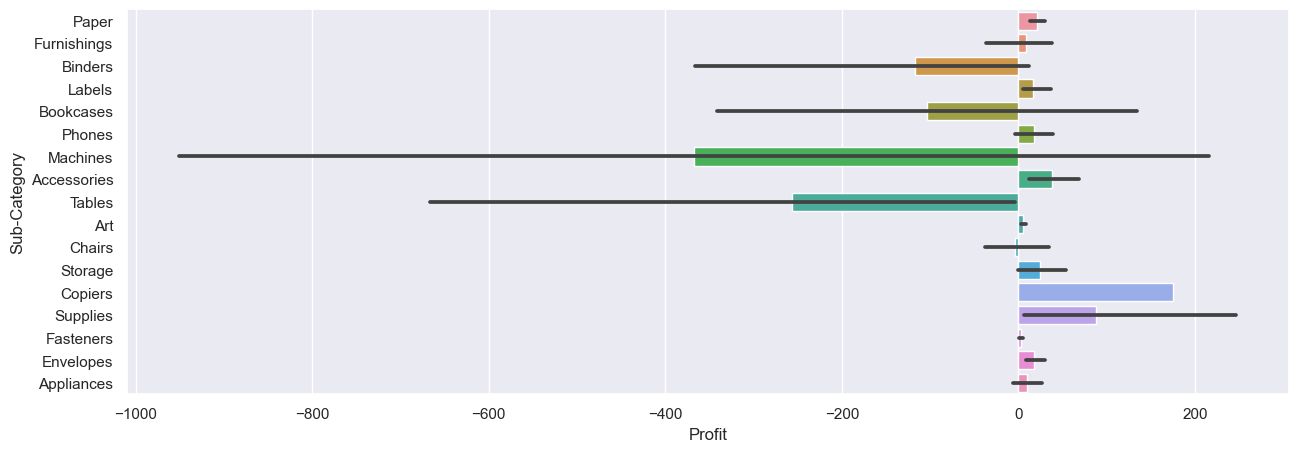

In [580]:
sns.barplot(x='Profit' , y='Sub-Category' , data=df_loss)

## City section

In [581]:
df.head()

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Sell_Price,year,time_shipping_spent,month,day_order
0,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,482.006400,2016,3,11,8
1,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,1976.238000,2016,3,11,8
2,2016-06-12,2016-06-16,Second Class,Darrin Van Huff,Corporate,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,22.368600,2016,4,6,12
3,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,3016.369125,2015,7,10,11
4,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,33.272400,2015,7,10,11


<AxesSubplot:xlabel='City'>

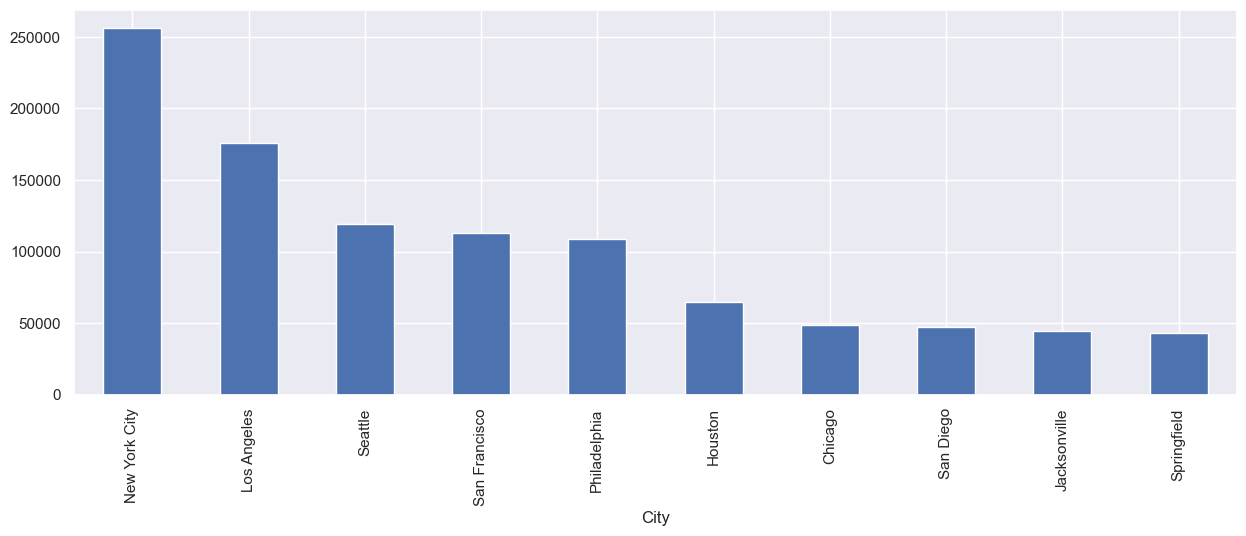

In [587]:
df.groupby(['City'])['Sales'].sum().sort_values(ascending=False)[:10].plot(kind='bar')

In [589]:
df_new['month']=df_new['Order Date'].dt.month_name()
df_new.head()

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Sell_Price,year,time_shipping_spent,month,day_order
7980,2014-01-03,2014-01-07,Standard Class,Darren Powers,Consumer,Houston,Texas,Central,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512,20.7656,2014,4,January,3
739,2014-01-04,2014-01-08,Standard Class,Phillina Ober,Home Office,Naperville,Illinois,Central,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717,24.0099,2014,4,January,4
740,2014-01-04,2014-01-08,Standard Class,Phillina Ober,Home Office,Naperville,Illinois,Central,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748,719.3412,2014,4,January,4
741,2014-01-04,2014-01-08,Standard Class,Phillina Ober,Home Office,Naperville,Illinois,Central,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870,6.9030,2014,4,January,4
1759,2014-01-05,2014-01-12,Standard Class,Mick Brown,Consumer,Philadelphia,Pennsylvania,East,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840,42.0024,2014,7,January,5
